**Students Performance in Exams**

> 


Aim:To understand the influence of various factors like economic, personal and social on the students performance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data_sets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df['Total_Score']=df.iloc[:,6:9].mean(axis=1)

In [6]:
df['Math_Result Status']= np.where(df['math score']<40,0,1 )
df['Reading_Result Status']= np.where(df['reading score']<40,0,1 )
df['Writing_Result Status']= np.where(df['writing score']<40,0,1 )

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Math_Result Status,Reading_Result Status,Writing_Result Status
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,1,1,1
1,female,group C,some college,standard,completed,69,90,88,89.0,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,94.0,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,1,1,1
4,male,group C,some college,standard,none,76,78,75,76.5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,97.0,1,1,1
996,male,group C,high school,free/reduced,none,62,55,55,55.0,1,1,1
997,female,group C,high school,free/reduced,completed,59,71,65,68.0,1,1,1
998,female,group D,some college,standard,completed,68,78,77,77.5,1,1,1


In [8]:
df['Mean']=df.iloc[:,9:-1].mean(axis=1)
df['Overall_Result Status']= np.where(df['Mean']< 1,'Fail','Pass' )

In [9]:
df.shape

(1000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total_Score                  1000 non-null   float64
 9   Math_Result Status           1000 non-null   int64  
 10  Reading_Result Status        1000 non-null   int64  
 11  Writing_Result Status        1000 non-null   int64  
 12  Mean                         1000 non-null   float64
 13  Overall_Result Stat

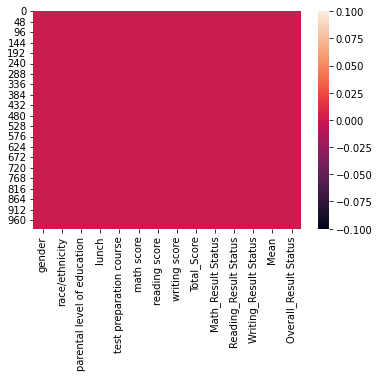

In [11]:
sns.heatmap(df.isnull())

**Creating Dummy Variables**

In [12]:
dummy_df=pd.concat([pd.get_dummies(df[['gender', 'lunch','test preparation course']],drop_first=True), df[['race/ethnicity','parental level of education','math score', 'reading score','writing score','Total_Score']]], axis=1)
dummy_df

,gender_male,lunch_standard,test preparation course_none,race/ethnicity,parental level of education,math score,reading score,writing score,Total_Score
0,0,1,1,group B,bachelor's degree,72,72,74,73.0
1,0,1,0,group C,some college,69,90,88,89.0
2,0,1,1,group B,master's degree,90,95,93,94.0
3,1,0,1,group A,associate's degree,47,57,44,50.5
4,1,1,1,group C,some college,76,78,75,76.5
...,...,...,...,...,...,...,...,...,...
995,0,1,0,group E,master's degree,88,99,95,97.0
996,1,0,1,group C,high school,62,55,55,55.0
997,0,0,0,group C,high school,59,71,65,68.0
998,0,1,0,group D,some college,68,78,77,77.5


**Doing Ordinal Encoding for Parents Education**
>
**Master -Max**
>
**some Highschool -Min**

In [13]:
dummy_df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
edu=['some high school','high school',"associate's degree", 'some college',"bachelor's degree",  "master's degree"]

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[edu])
dummy_df['parental level of education']=ord_enc.fit_transform(dummy_df[['parental level of education']])


**Doing Ordinal Encoding for Race/ethnicity**
>
**Master -Max**
>
**some Highschool -Min**

In [16]:
dummy_df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
race=['group A','group B', 'group C', 'group D', 'group E']

In [18]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc1=OrdinalEncoder(categories=[race])
dummy_df['race/ethnicity']=ord_enc1.fit_transform(dummy_df[['race/ethnicity']])

In [19]:
dummy_df

,gender_male,lunch_standard,test preparation course_none,race/ethnicity,parental level of education,math score,reading score,writing score,Total_Score
0,0,1,1,1.0,4.0,72,72,74,73.0
1,0,1,0,2.0,3.0,69,90,88,89.0
2,0,1,1,1.0,5.0,90,95,93,94.0
3,1,0,1,0.0,2.0,47,57,44,50.5
4,1,1,1,2.0,3.0,76,78,75,76.5
...,...,...,...,...,...,...,...,...,...
995,0,1,0,4.0,5.0,88,99,95,97.0
996,1,0,1,2.0,1.0,62,55,55,55.0
997,0,0,0,2.0,1.0,59,71,65,68.0
998,0,1,0,3.0,3.0,68,78,77,77.5


<Figure size 1152x648 with 0 Axes>

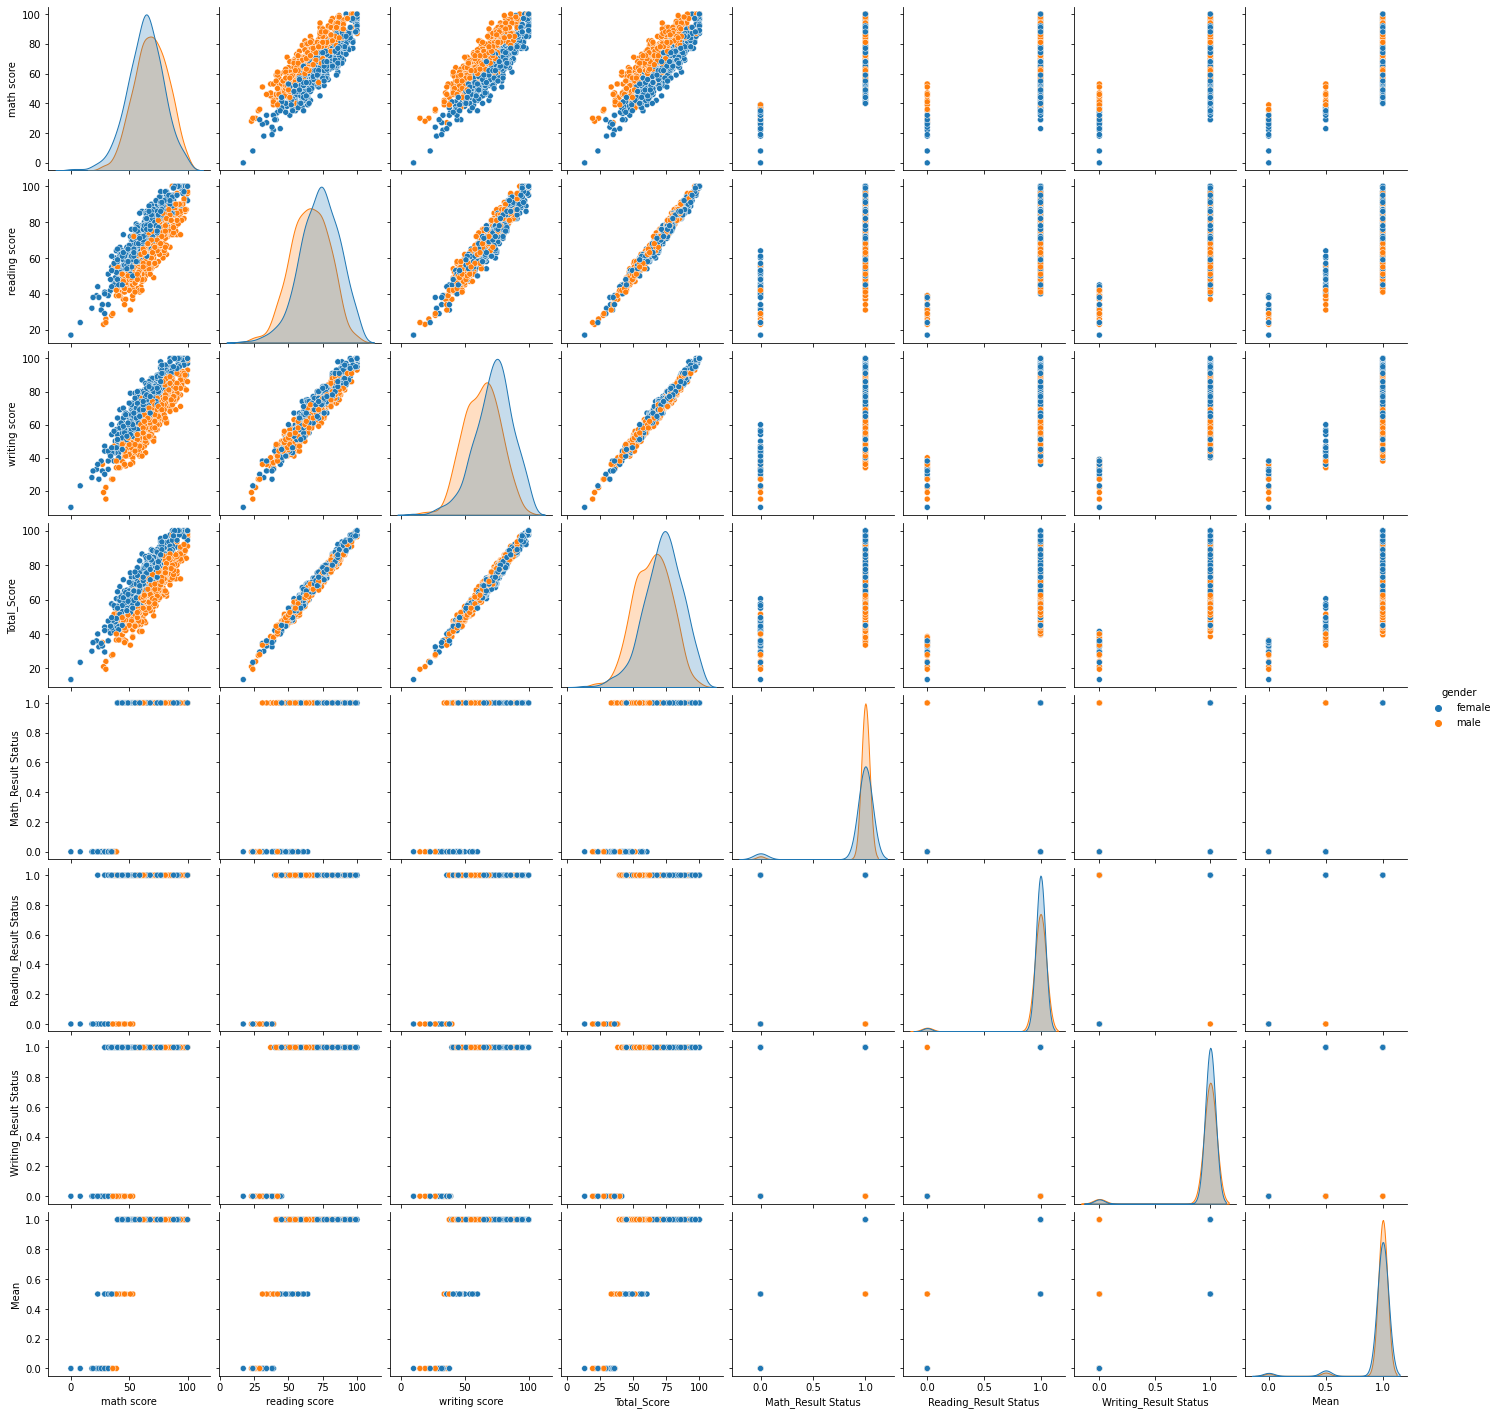

In [50]:
plt.figure(figsize=(16,9))
sns.pairplot(df,diag_kind='kde',hue='gender')

In [21]:
dummy_df.skew()

gender_male                     0.072155
lunch_standard                 -0.606955
test preparation course_none   -0.593282
race/ethnicity                 -0.144709
parental level of education     0.189663
math score                     -0.278935
reading score                  -0.259105
writing score                  -0.289444
Total_Score                    -0.281481
dtype: float64

In [22]:
# px.histogram(df['gender'],color=df['gender'],title='Gender distribution',lables={df['gender']:'Gender'})
px.histogram(df,x='gender',color='gender',labels={'gender':'Gender'},title='Gender distribution')

In [23]:
fig1=px.pie(df,names='race/ethnicity',title='Race/Ethnicity Distribution Amoung Students')
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()

In [24]:
px.histogram(df,x='race/ethnicity',color='gender',barmode='group',title="Student's Gender Presentation of Each Race")

In [25]:
fig2=px.pie(df,names=df['parental level of education'],title='Overall Distribution of Parents Education')
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

In [26]:
px.histogram(df,x='race/ethnicity',color='parental level of education',barmode='group',title='Education Level Of Parents From Each Race',text_auto=True)

In [27]:
px.histogram(df,x='parental level of education',color='lunch',labels={'gender':'Gender'},title="Lunch Variation (Percentage) in Accordance with Parent's Qaulification ",barmode='group',histnorm='percent')

In [28]:
fig4=px.pie(df,names=df['test preparation course'],title='Over all Distribution of Test Preparation course taken or not')
fig4.update_traces(textposition='inside', textinfo='percent+label')
fig4.show()

In [29]:
px.histogram(df,x='test preparation course',color='parental level of education',labels={'parental level of education':'Parental Level of Education'},title="Test Pre Course (Percentage) in Accordance with Parent's Qaulification ",barmode='group',text_auto=True)

In [30]:
px.histogram(df,'race/ethnicity','Total_Score',histfunc='avg',color='race/ethnicity',text_auto=True,title='Average Maks Scored By Student of Diffrent Race')

In [31]:
px.histogram(df,'parental level of education','Total_Score',histfunc='avg',color='parental level of education',text_auto=True,title='Average Maks Scored By Student (Parental Education)')

In [32]:
px.histogram(df,'test preparation course','Total_Score',histfunc='avg',color='test preparation course',text_auto=True,title='Avg Marks scored by Student(diffr by Course completed)')

In [33]:
px.pie(df,'Overall_Result Status',title='Overall distribution of Passed or Failed Students')

In [34]:
px.box(df,y='Total_Score',title='Box Plot for Marks of Students')

In [35]:
px.histogram(df,'Overall_Result Status',color='gender',text_auto=True,barmode='group',title='Pass/Fail Distribution by gender')

In [36]:
px.histogram(df,'Overall_Result Status',color='test preparation course',text_auto=True,barmode='group',title='Pass/Fail distribution of Students(by prep course): Student Analysis')

In [37]:
px.histogram(df,'test preparation course',color='Overall_Result Status',text_auto=True,barmode='group',title='Pass/Fail distribution of Students (by prep course): Couse Analysis')

In [38]:
px.histogram(df,'parental level of education',color='Overall_Result Status',text_auto=True,barmode='group',title='Result Status of Students Categorised by Parents Qualification')

In [39]:
px.histogram(df,'race/ethnicity',color='Overall_Result Status',text_auto=True,barmode='group',title='Result Status by Diffrent Race Students')

In [40]:
px.histogram(df,'lunch',color='Overall_Result Status',text_auto=True,barmode='group',title='Result Status of Students Categorised by Parents Qualification')

In [41]:
corr_mat=dummy_df.corr()
corr_mat

,gender_male,lunch_standard,test preparation course_none,race/ethnicity,parental level of education,math score,reading score,writing score,Total_Score
gender_male,1.000000,0.021372,-0.006028,-0.001502,-0.043801,0.167982,-0.244313,-0.301225,-0.276493
lunch_standard,0.021372,1.000000,0.017044,0.046563,-0.024071,0.350877,0.229560,0.245769,0.240572
test preparation course_none,-0.006028,0.017044,1.000000,-0.017508,0.016322,-0.177702,-0.241780,-0.312946,-0.281284
race/ethnicity,-0.001502,0.046563,-0.017508,1.000000,0.098378,0.216415,0.145253,0.165691,0.157473
parental level of education,-0.043801,-0.024071,0.016322,0.098378,1.000000,0.151928,0.175528,0.226108,0.203647
math score,0.167982,0.350877,-0.177702,0.216415,0.151928,1.000000,0.817580,0.802642,0.819311
reading score,-0.244313,0.229560,-0.241780,0.145253,0.175528,0.817580,1.000000,0.954598,0.988121
writing score,-0.301225,0.245769,-0.312946,0.165691,0.226108,0.802642,0.954598,1.000000,0.989039
Total_Score,-0.276493,0.240572,-0.281284,0.157473,0.203647,0.819311,0.988121,0.989039,1.000000


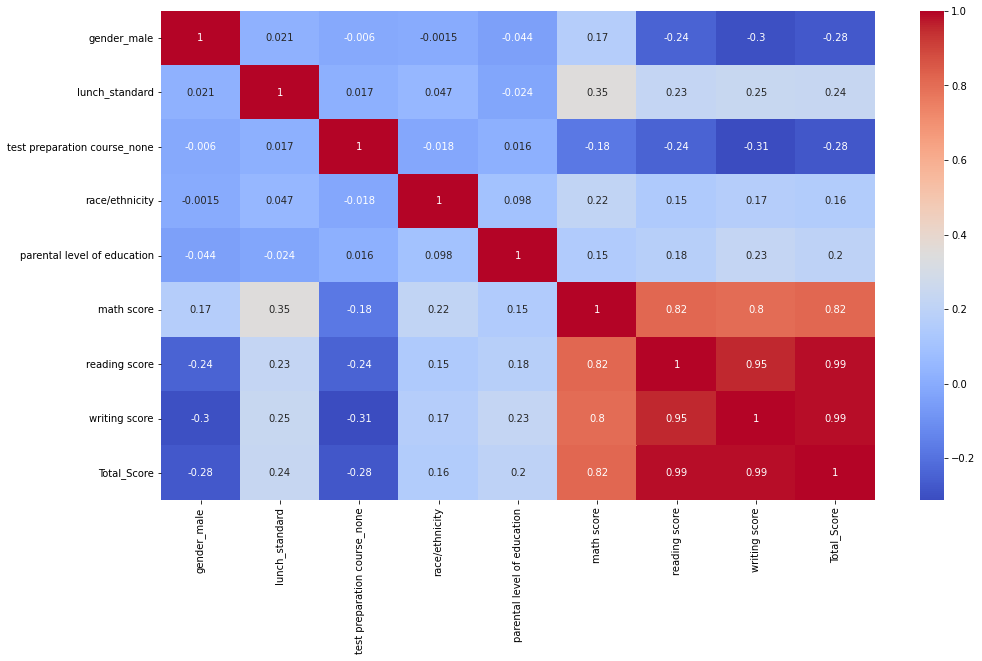

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True,cmap='coolwarm')

In [43]:
dummy_df.head()

,gender_male,lunch_standard,test preparation course_none,race/ethnicity,parental level of education,math score,reading score,writing score,Total_Score
0,0,1,1,1.0,4.0,72,72,74,73.0
1,0,1,0,2.0,3.0,69,90,88,89.0
2,0,1,1,1.0,5.0,90,95,93,94.0
3,1,0,1,0.0,2.0,47,57,44,50.5
4,1,1,1,2.0,3.0,76,78,75,76.5


In [44]:
x=dummy_df.iloc[:,:4].values
y=dummy_df.iloc[:,-1].values

In [45]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [47]:
pred=reg.predict(xtest)
pred=pred.round(2)
d={'True Value':ytest,'Predicted Value':pred}
Compare=pd.DataFrame(data=d)
Compare

,True Value,Predicted Value
0,73.0,65.90
1,72.5,55.67
2,48.0,64.84
3,63.0,57.21
4,77.0,72.06
...,...,...
195,60.5,57.21
196,89.0,72.00
197,79.0,70.99
198,72.0,78.16


In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import math
rscore=r2_score(ytest,pred)
rms=math.sqrt(mean_squared_error(ytest,pred))
print("R2 SCore:",rscore)
print("RMS Score:",rms)

R2 SCore: 0.18083628571245813
RMS Score: 13.41953050594543


In [49]:
diff=abs(pred-ytest)
diff.mean()
print("The Average Error in Marks:",diff.mean())

The Average Error in Marks: 10.7226
